
Hava Kirliliği nedir ? Hava kirliliği; havada katı, sıvı ve gaz şeklindeki yabancı maddelerin insan sağlığına, canlı hayatına ve ekolojik dengeye zarar verecek miktar, yoğunluk ve uzun sürede atmosferde bulunmasıdır. 
İnsanların çeşitli faaliyetleri sonucu meydana gelen üretim ve tüketim aktiviteleri sırasında ortaya çıkan atıklarla hava tabakası kirlenerek, yeryüzündeki canlı hayatını olumsuz yönde etkilemektedir.
Hava kirliliği yüzünden her sene 7 milyon kişi ölmektedir.



Verimizde Bulunun Değerler
AQI Değeri : Hava Kitle İndeksi (AQI) Bir bölgenin havasının kalitesini ifade etmek için kullanılan ölçü birimidir. AQI ölçü birimi endeks değerlerine göre risk gruplarına ve renklere bölünmüştür
AQI Kategorisi : Şehrin genel AQI kategorisi
CO AQI Değeri : Şehrin Karbon Monoksitinin AQI değeri
CO AQI Kategorisi : Şehrin Karbon Monoksit AQI kategorisi
Ozon AQI Değeri : Şehrin Ozonunun AQI değeri
Ozon AQI Kategorisi : Şehrin Ozonunun AQI kategorisi
NO2 AQI Değeri : Şehrin Azot Dioksitinin AQI değeri
NO2 AQI Kategorisi : Şehrin Azot Dioksit AQI kategorisi
PM2.5 AQI Değeri : Çapı 2,5 mikrometre veya daha küçük olan Partikül Maddenin AQI değeri
PM2.5 AQI Kategorisi : Çapı 2,5 mikrometre veya daha az olan Partikül Maddenin AQI kategorisi

![](https://oizom.com/wp-content/uploads/2019/08/2-1.png)

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px 
from sklearn.preprocessing import StandardScaler
from statistics import mean, median, mode, stdev
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor


In [2]:
warnings.simplefilter(action='ignore', category=Warning)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 300)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
#veriyi okuma
df = pd.read_csv("/kaggle/input/global-air-pollution-dataset/global air pollution dataset.csv")

In [4]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [5]:
#öncelikle veriyi tanımak için bir fonksiyon yazalım

def check_data(df,n=5):
    #sayısal değişkenlere genel bakış
    print("sayısal değişkenlere genel bakış")
    print("*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\n")
    print(df.describe().T)
    print("\n\n")
    
    # boyut bilgisi
    print("boyut bilgisi")
    print("*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\n")
    print(df.shape)
    print("\n\n")
    
    # Verinin ilk beş satırını görüntüle
    print("ilk",n,"satır")
    print("*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\n")
    print(df.head(n))
    print("\n\n")
    
    #Verinin son beş satırını görüntüle
    print("son",n,"satır")
    print("*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\n")
    print(df.tail(n))
    print("\n\n")
    
    # Veri hakkında bilgi görüntüle
    print("veriye genel bakış")
    print("*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\n")
    print(df.info())
    print("\n\n")
    
    # Sütun tiplerini görüntüle
    print("sütun tipleri neler")
    print("*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\n")
    print(df.dtypes)
    print("\n\n")
    
    # Eksik verileri say
    print("eksik verilere genel bakış")
    print("*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\n")
    print(df.isnull().sum())

In [6]:
check_data(df)

sayısal değişkenlere genel bakış
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

                      count     mean      std     min      25%      50%      75%       max
AQI Value       23463.00000 72.01087 56.05522 6.00000 39.00000 55.00000 79.00000 500.00000
CO AQI Value    23463.00000  1.36837  1.83206 0.00000  1.00000  1.00000  1.00000 133.00000
Ozone AQI Value 23463.00000 35.19371 28.09872 0.00000 21.00000 31.00000 40.00000 235.00000
NO2 AQI Value   23463.00000  3.06333  5.25411 0.00000  0.00000  1.00000  4.00000  91.00000
PM2.5 AQI Value 23463.00000 68.51975 54.79644 0.00000 35.00000 54.00000 79.00000 500.00000



boyut bilgisi
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

(23463, 12)



ilk 5 satır
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

              Country              City  AQI Value AQI Category  CO AQI Value CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category
0  Russian Federation        Praskoveya         51     Moderat

**VERİ ÖN İŞLEME**

In [7]:
#verimizdeki eksik değerlerin oranına bakalım

def missing_values_percentage(df):
    #eksik değer barındıran sütunları listeye ekleyelim
    mis_val_col = []
    for column in df.columns:
      if df[column].isnull().any():
        mis_val_col.append(column)
    
    #eğer boş küme dönerse eksik veri olmadığını ekrana bastıralım
    if len(mis_val_col) == 0:
        print("verinizde eksik değer bulunmuyor")

    #eksik verilerin sütundaki toplam veri sayısına oranını ekrana bastıralım 
    for col in mis_val_col:
        total_values = df[col].count()
        missing_values = df[col].isnull().sum()
        percentage = (missing_values/total_values) * 100
        print(f"{col} sütununda {percentage:.3f}% eksik değer var \n")

In [8]:
missing_values_percentage(df)

Country sütununda 1.854% eksik değer var 

City sütununda 0.004% eksik değer var 



buna göre eksik değerlerin oranı çok ciddiye alınabilir değil. bu yüzden silme yöntemiyle veriyi eksik değerlerden kurtaralım

In [9]:
df = df.dropna()

In [10]:
missing_values_percentage(df)

verinizde eksik değer bulunmuyor


şimdi gözle aykırı değerlere bakmak için kutu grafikleri oluşturalım 
bunun için önceklikle değişkenlerimizi numerik kategorik olarak ayıralım. 
daha fonksiyonel olması için numerik gibi görünen kategorik değişkenler olma ihtimalini de gözetelim. 

In [11]:
def separate_variables(df,treshold=10):
    numeric_vars = []
    categorical_vars = []
    other_vars = []
    
    for col in df.columns:
        if (df[col].dtype == "float64" or df[col].dtype ==  "int64") and len(df[col].unique()) > treshold:
            numeric_vars.append(col)
        elif len(df[col].unique()) > treshold: 
            other_vars.append(col)
        else:
            categorical_vars.append(col)
    
    print("Numerik değişkenler:{} \nKategorik değişkenler:{} \nDiğer değişkenler:{}".format(numeric_vars, categorical_vars,other_vars))
    return numeric_vars, categorical_vars, other_vars

In [12]:
numeric_vars, categorical_vars, other_vars = separate_variables(df)

Numerik değişkenler:['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value'] 
Kategorik değişkenler:['AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category'] 
Diğer değişkenler:['Country', 'City']


#numerik değişkenlerin aykırı değerlerini grafik üzerinde görelim 

<function matplotlib.pyplot.show(close=None, block=None)>

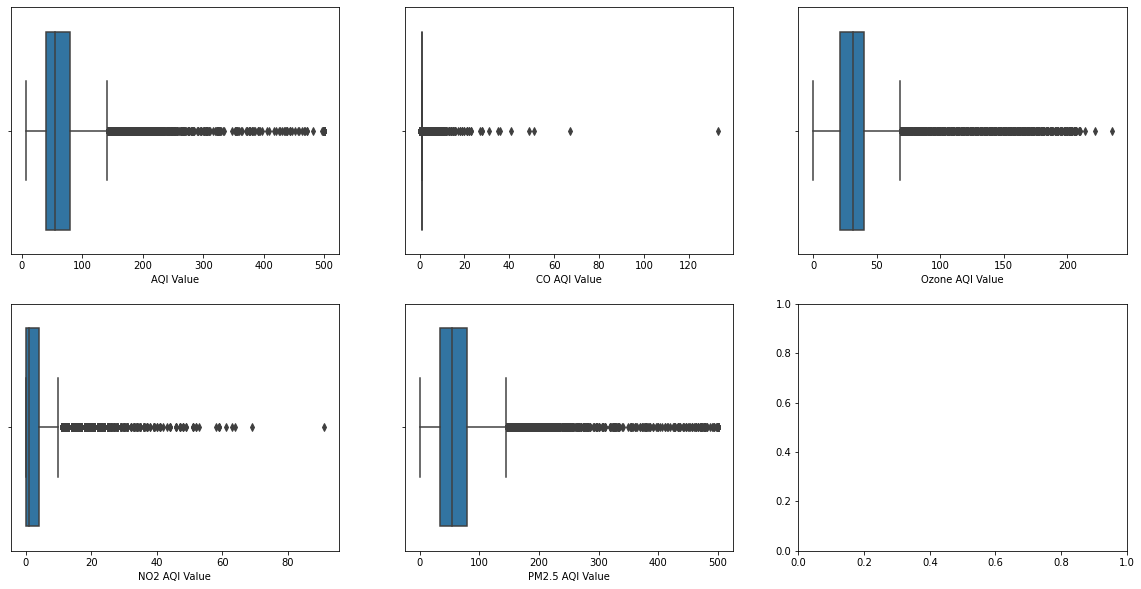

In [13]:
fig, axs = plt.subplots(2, 3)
plt.gcf().set_size_inches(20, 10)
for i, col in enumerate(numeric_vars):
    sns.boxplot(df[col], ax=axs[i // 3, i % 3])
plt.show

#verimizde varsayılan eşik değerlere göre aykırı değer sayılabilecek çok sayıda değişken görünüyor
#bunları doğrudan aykırı değer olarak değerlendirmenin doğru olmadığını düşünüyoruz. 
#bu yüzden verinin üçte birinci (Q1) ve üçte üçüncü (Q3) kuartil değerlerini kendimiz hesapladığımız bir fonksiyon yazalım

In [14]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

#buna göre aykırı değerleri tekrar gözden geçirelim. 

In [15]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True    
    else:
        return False

In [16]:
def grab_outliers(dataframe, col_name):
    low, up = outlier_thresholds(dataframe, col_name)
    outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
    return outlier_index

In [17]:
for col in numeric_vars:
    outlier_index = grab_outliers(df,col) 
    percentage_outliers =  len(outlier_index)/len(df[col])* 100
    print(f"{col} sütununda;\n{len(outlier_index)} adet aykırı değerli örneklem vardır (%{percentage_outliers:.3f})\n")

AQI Value sütununda;
132 adet aykırı değerli örneklem vardır (%0.573)

CO AQI Value sütununda;
93 adet aykırı değerli örneklem vardır (%0.404)

Ozone AQI Value sütununda;
33 adet aykırı değerli örneklem vardır (%0.143)

NO2 AQI Value sütununda;
105 adet aykırı değerli örneklem vardır (%0.456)

PM2.5 AQI Value sütununda;
99 adet aykırı değerli örneklem vardır (%0.430)



#q1 = 0.05 ve q3 = 0.95 değerleriyle elde ettiğimiz aykırılıkların silinmesi yaklaşımını uygulayalım 

In [18]:
#numerik sütunları döngü içerisinde aykırı değerlerinden arındıralım. 
for col in numeric_vars:
    low_limit, up_limit = outlier_thresholds(df, col)
    df = df[~((df[col] < low_limit) | (df[col] > up_limit))]

In [19]:
#son haliyle verimizin boyutuna bakalım 
df.shape

(22702, 12)

<function matplotlib.pyplot.show(close=None, block=None)>

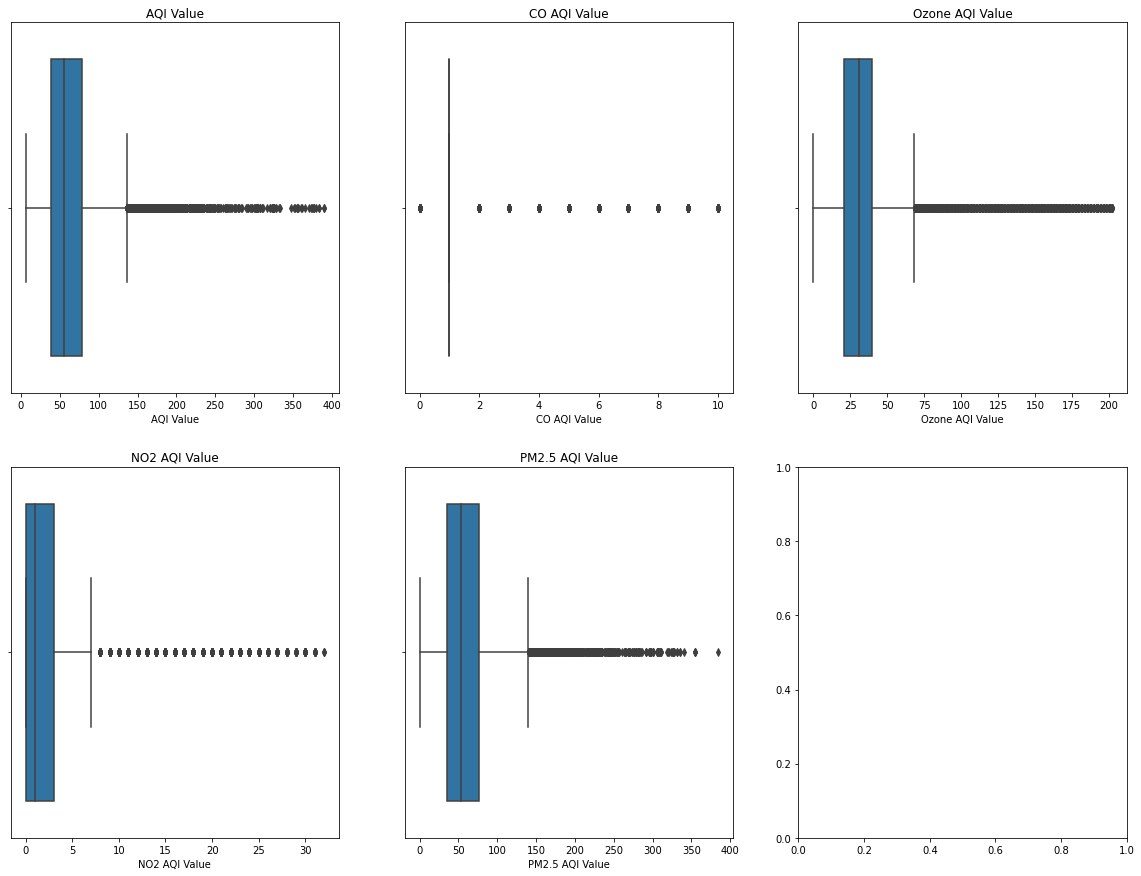

In [20]:
fig, axs = plt.subplots(2, 3)
plt.gcf().set_size_inches(20, 15)
for i, col in enumerate(numeric_vars):
    sns.boxplot(df[col], ax=axs[i // 3, i % 3])
    axs[i // 3, i % 3].set_title(col)

plt.show

#bu sonuçlara göre, CO AQI value değerlerinin benzer özellikte bir kısmının aykırı değer olarak değerlendirildiğini tespit ettik 
#bu verinin içerdiği anlamı kaybetmesine sebep olabilir.
#emin olmak için veri içerisinde barınan her numerik değişkene karşılık gelen kategorik değişkenlerin de kutu grafiğini çizdirelim.

In [21]:
cat_num_dict = dict(zip(categorical_vars,numeric_vars))

<function matplotlib.pyplot.show(close=None, block=None)>

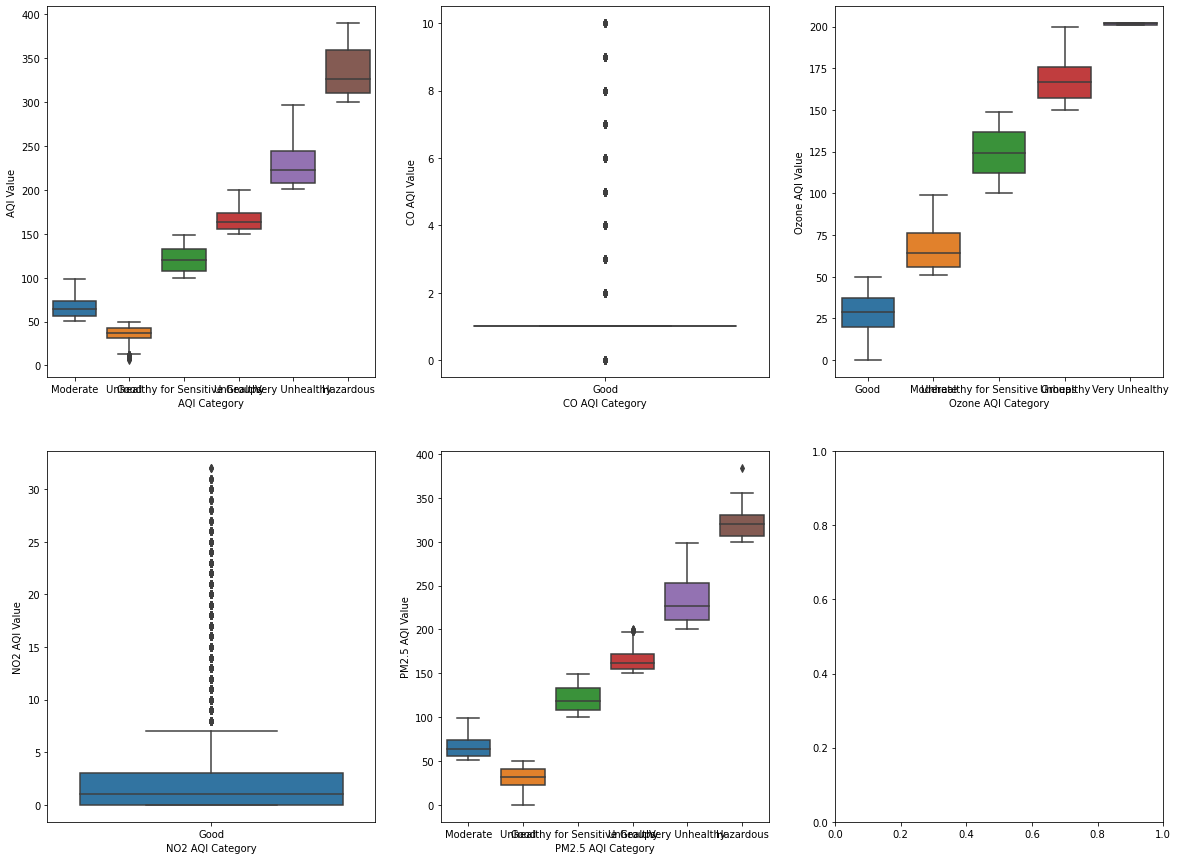

In [22]:
fig, axs = plt.subplots(2, 3)
plt.gcf().set_size_inches(20, 15)
for i, col in enumerate(numeric_vars):
    sns.boxplot(x=list(cat_num_dict.keys())[i], y=list(cat_num_dict.values())[i], data=df,ax=axs[i // 3, i % 3])


plt.show

>#tahmin ettiğimiz gibi CO2 AQI değişkeninde bozulmaya neden olmuşuz. başlangıçta 3 kategorisi bulunan CO2 value değeri normal dağılıma 
#sahip olmadığı için, q1,q3 eşikleri anlamlı verileri kaybetmemize de sebep oldu. 
#bunu istemediğimizden verimizde aykırı değerlere yönelik işlem yapmamayı tercih ediyoruz. 

In [23]:
#veriyi tekrar yükleyip eksik değerlerden kurtulalım.
df = pd.read_csv("/kaggle/input/global-air-pollution-dataset/global air pollution dataset.csv")
df = df.dropna()

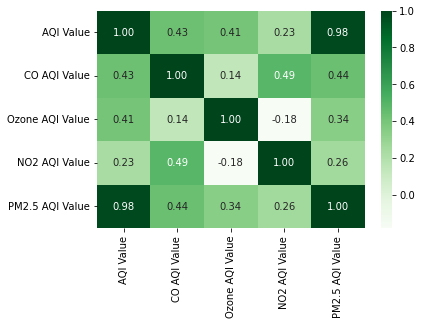

In [24]:
#korelasyon matrisine bakalım
sns.heatmap(df.corr(),annot=True, cbar=True, cmap='Greens', fmt='.2f');

"""
tablomuza göre yüksek korelasyonlu 2 değişkenimiz var.
"""

**Tahmin Modeli için hazırlık****

In [25]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [26]:
#eşsiz değerlere bakmak için bir fonksiyon yazalım (yalnızca object tipinde )
def count_unique_values(df):
    for col in df.columns:
        if df[col].dtype == object:
            print(f"{col} sütununda {df[col].nunique()} eşsiz değer var \n")

In [27]:
df.shape

(23035, 12)

In [28]:
count_unique_values(df)

Country sütununda 175 eşsiz değer var 

City sütununda 23035 eşsiz değer var 

AQI Category sütununda 6 eşsiz değer var 

CO AQI Category sütununda 3 eşsiz değer var 

Ozone AQI Category sütununda 5 eşsiz değer var 

NO2 AQI Category sütununda 2 eşsiz değer var 

PM2.5 AQI Category sütununda 6 eşsiz değer var 



#buna göre kategorik değişkenleri kuracağımız modellerin anlayabilmesi için encoding işlemlerinden geçirelim 

In [29]:
#one hot encoder nesnemizi oluşturalım
one_hot_encoder = OneHotEncoder()
#ohe yapacağımız fonksiyonu yazalım 
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [30]:
#ohe uygulayacağımız kategorik değişkenleri filtreleyelim 
cate_cols = [col for col in df.columns if 10 >= df[col].nunique() > 1]

cate_cols

['AQI Category',
 'CO AQI Category',
 'Ozone AQI Category',
 'NO2 AQI Category',
 'PM2.5 AQI Category']

In [31]:
#beklediğimiz değişkenleri aldık şimdi ohe fonksiyonumuza bunları gönderelim ve yeni df olarak kaydedelim
#dummy değişken tuzağına düşmemek için fonksiyonumuzda varsayılan False argümanını True olarak gönderdik
df_last = one_hot_encoder(df, cate_cols,True)

pd.set_option('display.max_columns', 30)
df_last.head()

,Country,City,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category_Hazardous,AQI Category_Moderate,AQI Category_Unhealthy,AQI Category_Unhealthy for Sensitive Groups,AQI Category_Very Unhealthy,CO AQI Category_Moderate,CO AQI Category_Unhealthy for Sensitive Groups,Ozone AQI Category_Moderate,Ozone AQI Category_Unhealthy,Ozone AQI Category_Unhealthy for Sensitive Groups,Ozone AQI Category_Very Unhealthy,NO2 AQI Category_Moderate,PM2.5 AQI Category_Hazardous,PM2.5 AQI Category_Moderate,PM2.5 AQI Category_Unhealthy,PM2.5 AQI Category_Unhealthy for Sensitive Groups,PM2.5 AQI Category_Very Unhealthy
0,Russian Federation,Praskoveya,51,1,36,0,51,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Brazil,Presidente Dutra,41,1,5,1,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Italy,Priolo Gargallo,66,1,39,2,66,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,Poland,Przasnysz,34,1,34,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,France,Punaauia,22,0,22,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
#bağımlı değişkenimizi NO2 AQI Value olarak seçtik 
#bir anlam içermeyen city, country değişkenlerini, bağımlı değişkenimizi ve 
#doğrudan bağımlı değişkenden çıkarılan category değişkenimizi çıkarmak için listeye alalım 

drop_list = ["Country","City","NO2 AQI Value","NO2 AQI Category_Moderate"]

In [33]:
X = df_last.drop(drop_list, axis=1)
y = df_last[["NO2 AQI Value"]]

In [34]:
#son haliyle modelimiz kurulmaya hazır. 
X.head()

,AQI Value,CO AQI Value,Ozone AQI Value,PM2.5 AQI Value,AQI Category_Hazardous,AQI Category_Moderate,AQI Category_Unhealthy,AQI Category_Unhealthy for Sensitive Groups,AQI Category_Very Unhealthy,CO AQI Category_Moderate,CO AQI Category_Unhealthy for Sensitive Groups,Ozone AQI Category_Moderate,Ozone AQI Category_Unhealthy,Ozone AQI Category_Unhealthy for Sensitive Groups,Ozone AQI Category_Very Unhealthy,PM2.5 AQI Category_Hazardous,PM2.5 AQI Category_Moderate,PM2.5 AQI Category_Unhealthy,PM2.5 AQI Category_Unhealthy for Sensitive Groups,PM2.5 AQI Category_Very Unhealthy
0,51,1,36,51,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,41,1,5,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,66,1,39,66,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,34,1,34,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,22,0,22,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
y.head()

,NO2 AQI Value
0,0
1,1
2,2
3,0
4,0


**Lineer regresyon modeli**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)

In [37]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

R-squared (R^2) bir makine öğrenimi modelinin performansını ölçmek için kullanılan bir metriktir. R^2, modelin girdi değişkenleriyle çıktı değişkeni arasındaki ilişki derecesini ölçer. R^2 değerinin 1 olması, modelin çıktı değişkenini %100 oranında açıkladığı anlamına gelir. Değer 0 ise modelin çıktı değişkenini hiçbir şekilde açıklamadığını gösterir. Negatif bir değer ise modelin anlamsız olduğunu gösterir.

In [38]:
y_pred = reg_model.predict(X_test)


In [39]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R-Squared: ", r2)

MAE:  2.523232497789165
MSE:  23.928451492335643
RMSE:  4.891671646005652
R-Squared:  0.10806252979602471


**Model Sonuçlarının değerlendirilmesi**


In [40]:
#MAE değerimiz standart sapması 5,7 olan bir değişken için ortalama değerlerde ancak tek başına bir fikir vermiyor. 
#bu yüzden R2 skoruna da bakmak ,istedik 
#r2 değerimiz oldukça düşük çıktı. burada geriye dönüp baktığımızda bunun olası nedenleri;

#1- aykırı değerler üzerine yeteri kadar çalışmamamız,
#2- verinin içerdiği özelliklerin yetersiz olması
#3- hiperparametre optimizasyonu yapılmaması
#4- iş bilgisinin yeteri kadar olmamasından doğan veri önişleme adımındaki yetersiz yaklaşımlar olabilir
#modelimizi bir de uzaklık temelli ağaç yöntemlerinde kurmayı deneyelim

**Karar ağacı model hazırlığı**

In [41]:
#uzaklık temelli ağaç yöntemleri kullanmadan önce sayısal değişkenlerimizi standartlaştıralım

In [42]:
#scale nesnemizi oluşturalım
scaler = StandardScaler()

#numerik değişkenlerimizi standartlaştıralım
df_last[numeric_vars] = scaler.fit_transform(df_last[numeric_vars])

In [43]:
df_last.head()

,Country,City,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category_Hazardous,AQI Category_Moderate,AQI Category_Unhealthy,AQI Category_Unhealthy for Sensitive Groups,AQI Category_Very Unhealthy,CO AQI Category_Moderate,CO AQI Category_Unhealthy for Sensitive Groups,Ozone AQI Category_Moderate,Ozone AQI Category_Unhealthy,Ozone AQI Category_Unhealthy for Sensitive Groups,Ozone AQI Category_Very Unhealthy,NO2 AQI Category_Moderate,PM2.5 AQI Category_Hazardous,PM2.5 AQI Category_Moderate,PM2.5 AQI Category_Unhealthy,PM2.5 AQI Category_Unhealthy for Sensitive Groups,PM2.5 AQI Category_Very Unhealthy
0,Russian Federation,Praskoveya,-0.37872,-0.20394,0.02713,-0.58405,-0.32482,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Brazil,Presidente Dutra,-0.55615,-0.20394,-1.07076,-0.39472,-0.50645,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Italy,Priolo Gargallo,-0.11257,-0.20394,0.13338,-0.20538,-0.05237,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,Poland,Przasnysz,-0.68036,-0.20394,-0.04370,-0.58405,-0.88788,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,France,Punaauia,-0.89327,-0.74598,-0.46869,-0.58405,-1.14217,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**DT modelinin kurulması**

In [44]:
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X_train,y_train)
y_pred2 = r_dt.predict(X_test)


In [45]:
print("Decision Tree R2 degeri:")
print(r2_score(y_test, r_dt.predict(X_test)))


Decision Tree R2 degeri:
0.2304484070028705


In [46]:
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred2)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R-Squared: ", r2)

MAE:  2.373992871862961
MSE:  20.645144507350203
RMSE:  4.543692827134136
R-Squared:  0.2304484070028705


Daha iyi bir sonuç elde ettik. bunu hiperparametre optimizasyonuyla arttırmayı hedefleyelim

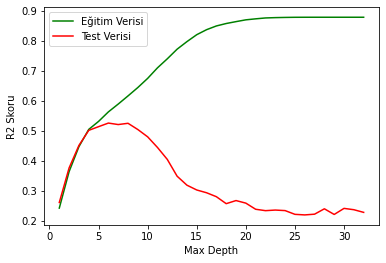

In [47]:
# model karmaşıklığını max_depths parametresiyle arttırarak hiperparametre optimizasyonu yapalım
max_depths = np.linspace(1, 32, 32, endpoint=True)


train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeRegressor(max_depth=max_depth)
    dt.fit(X_train, y_train)

    #r2 değerlerini eğitim ve test veri için liste1ye ekleyelim
    train_pred = dt.predict(X_train)
    train_r2 = r2_score(y_train, train_pred)
    train_results.append(train_r2)

    
    test_pred = dt.predict(X_test)
    test_r2 = r2_score(y_test, test_pred)
    test_results.append(test_r2)

#train ve test r2 sonuclarını grafik ile görekek optimum max_depth değerini elde edelim. 
plt.plot(max_depths, train_results, 'g', label='Eğitim Verisi')
plt.plot(max_depths, test_results, 'r', label='Test Verisi')
plt.ylabel('R2 Skoru')
plt.xlabel('Max Depth')
plt.legend()
plt.show()

Grafiğe göre eğitim ve test veri setinin başarısının birlikte artış gösterdiği son nokta, seçtiğimiz max_depth parametresinin 5 olduğunu nokta. Yaklaşık olarak 0.5 r2 scoru vermesini bekleyebiliriz. 

Sonuç olarak; hava kirliliği yalnızca bir değişkene bağlı olmayan farklı elementlerin AQI değerlerinin hesaplanarak değerlendirilmesi gereken önemli bir problemdir. Bu elementleri ölçmenin maliyetlerini azaltmak için veri madenciliği yöntemlerini kullanarak NO2 AQI değerini tahmin etmeye çalıştık.